#### Load the dataset

In [24]:
import pandas as pd

data = pd.read_csv('hydrogen_projects.csv')

### Data Preparation
Convert the 'Date online' column to datetime format

Extract the year from 'Date online'

In [25]:
data['Date online'] = pd.to_datetime(data['Date online'], errors='coerce', format="%Y")
data['Decomission date'] = pd.to_datetime(data['Decomission date'], errors='coerce', format="%Y")

data['Year'] = data['Date online'].dt.year
data.head()

,Ref,Project name,Country,Date online,Decomission date,Status,Technology,Technology_details,Technology_electricity,Technology_electricity_details,...,EndUse_CH4 mobility,Announced Size,Capacity_MWel,Capacity_Nm³ H₂/h,Capacity_kt H2/y,Capacity_t CO₂ captured/y,zero-carbon estimated normalized capacity [Nm³ H₂/hour],References,LOWE_CF,Year
0,2,Solar PV Plant port of Sines,PRT,2030-01-01,NaT,Feasibility study,Other Electrolysis,Unknown PtX,Dedicated renewable,Offshore wind,...,NaN,1GW,NaN,NaN,NaN,NaN,NaN,[495][607][608][1064],0.55,2030.0
1,3,H2GO Energy Park Oude-Tonge - 1st phase,NLD,2023-01-01,NaT,FID/Construction,Other Electrolysis,Unknown PtX,Dedicated renewable,Others/Various,...,NaN,2.5MW,2.500000,556.0,0.4,NaN,556.0,[503][630][609],0.50,2023.0
2,4,H2GO Energy Park Oude-Tonge - 2nd phase,NLD,2030-01-01,NaT,Concept,Other Electrolysis,Unknown PtX,Dedicated renewable,Others/Various,...,NaN,26MW,23.500000,5222.0,4.1,NaN,5222.0,[503][630][609],0.50,2030.0
3,5,"NortH2, phase 1",NLD,2030-01-01,NaT,Feasibility study,Other Electrolysis,Unknown PtX,Dedicated renewable,Offshore wind,...,NaN,4GW,4000.000000,888889.0,693.0,NaN,888889.0,[379],0.55,2030.0
4,6,Norsk e-Fuel Phase 1,NOR,2026-01-01,NaT,FID/Construction,SOEC,NaN,Dedicated renewable,Others/Various,...,NaN,12.5 million litres of synthetic kerosene per ...,50.263583,13227.0,10.3,NaN,13227.0,[414] [521][1288][1449] [1693],0.50,2026.0


Filter out projects with valid technology and year

In [3]:
technology_data = data[["Year", "Technology", "Country"]].dropna(subset=["Technology", "Year"])
technology_data["Year"] = technology_data["Year"].astype(int)
technology_data.head()

,Year,Technology,Country
0,2030,Other Electrolysis,PRT
1,2023,Other Electrolysis,NLD
2,2030,Other Electrolysis,NLD
3,2030,Other Electrolysis,NLD
4,2026,SOEC,NOR


Analyze technology adoption over time

In [4]:
technology_trends = technology_data.groupby(['Year', "Technology"]).size().reset_index(name='Count')
technology_trends.head()

,Year,Technology,Count
0,1965,ALK,1
1,1975,ALK,1
2,1982,NG w CCUS,1
3,1992,ALK,1
4,2000,ALK,3


Pivot table for easier visualization

In [5]:
technology_pivot = technology_trends.pivot(index='Year', columns="Technology", values='Count').fillna(0)
technology_pivot = technology_pivot.astype(int)
technology_pivot.head()

Technology,ALK,Biomass,Biomass w CCUS,Coal w CCUS,NG w CCUS,Oil w CCUS,Other,Other Electrolysis,PEM,SOEC
Year,,,,,,,,,,
1965,1,0,0,0,0,0,0,0,0,0
1975,1,0,0,0,0,0,0,0,0,0
1982,0,0,0,0,1,0,0,0,0,0
1992,1,0,0,0,0,0,0,0,0,0
2000,3,0,0,1,0,0,0,2,5,0


Plot technology adoption trends over time

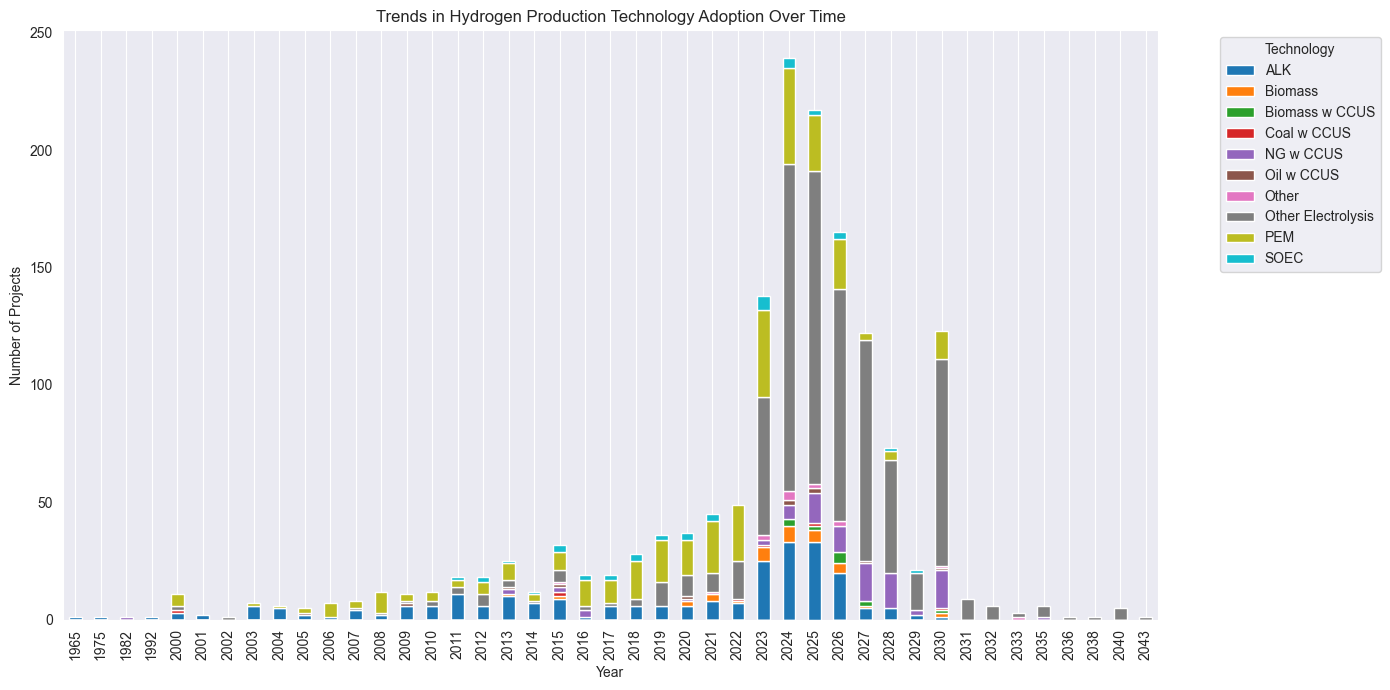

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
technology_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Trends in Hydrogen Production Technology Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Regional Analysis
Count technology adoption by country

In [7]:
top_countries = technology_data.groupby(['Country']).size()
top_countries = top_countries[top_countries > 30].index.tolist()
regional_technology = technology_data[technology_data["Country"].isin(top_countries)].groupby(['Country', 'Technology']).size().reset_index(name='Count')
regional_technology = regional_technology.sort_values(by='Count', ascending=False)
regional_technology.head()

,Country,Technology,Count
48,FRA,Other Electrolysis,69
26,DEU,PEM,64
36,ESP,Other Electrolysis,63
4,AUS,Other Electrolysis,63
25,DEU,Other Electrolysis,54


Plot regional technology adoption

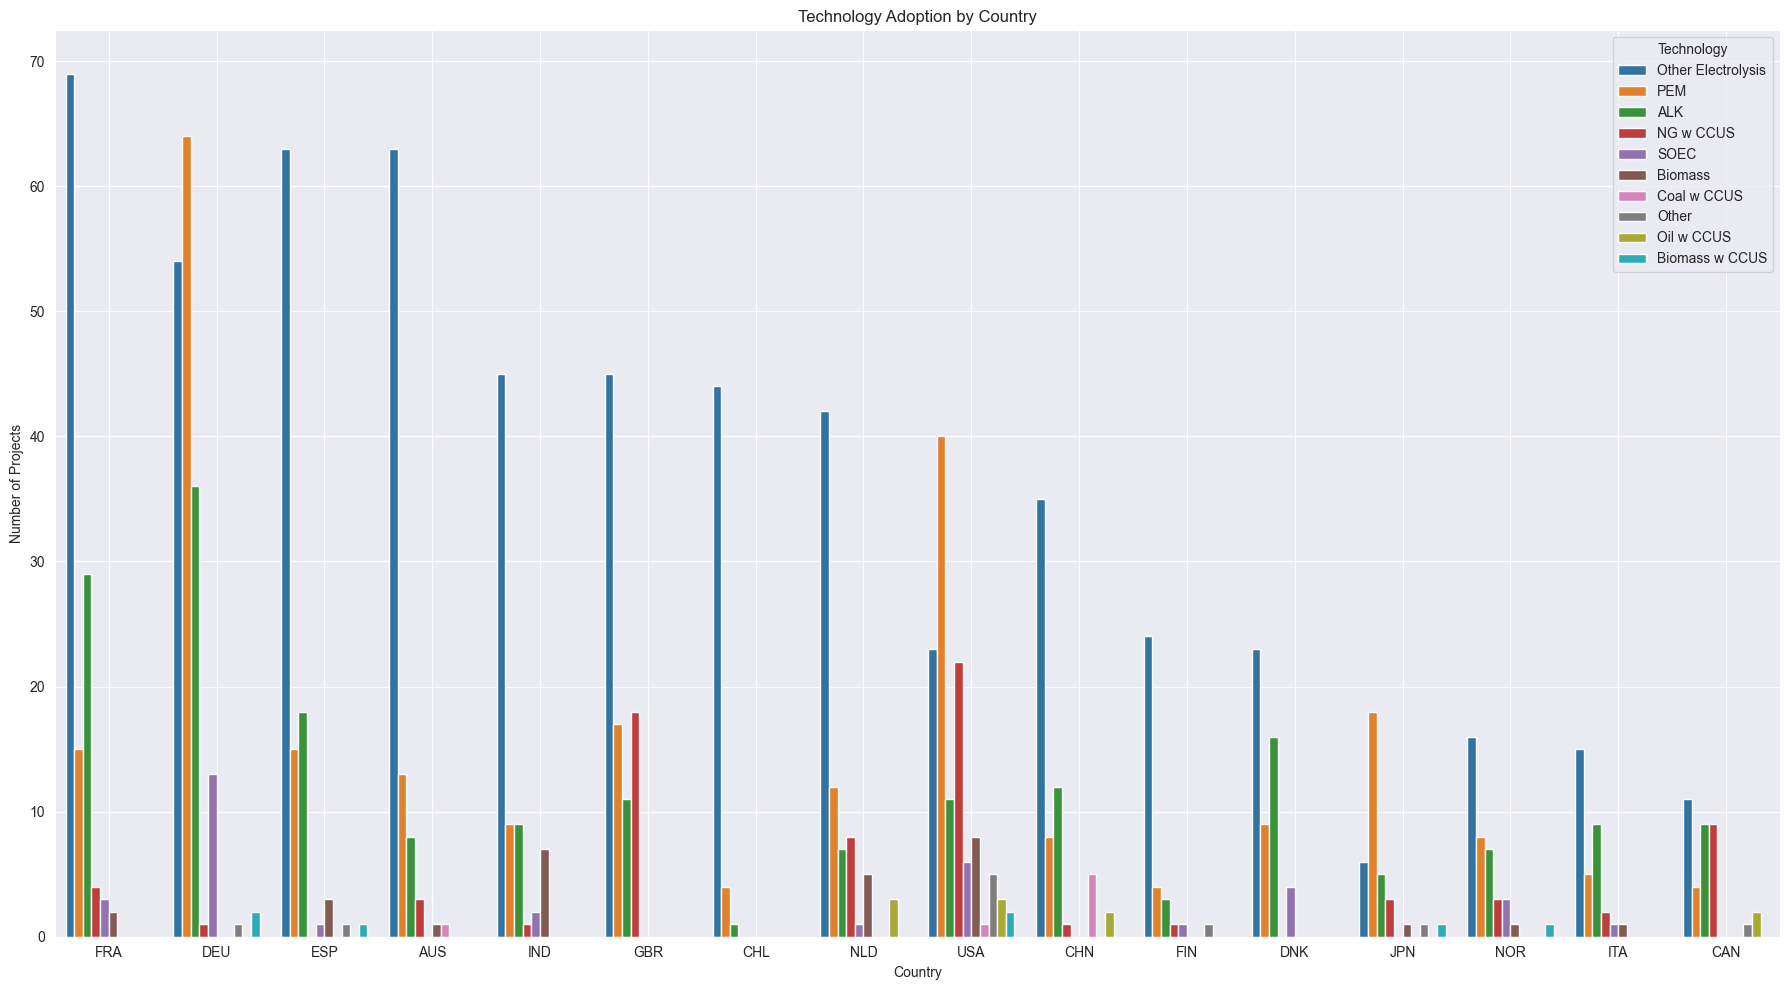

In [8]:
import seaborn as sns

plt.figure(figsize=(18, 10))
sns.barplot(y='Count', x='Country', hue='Technology', data=regional_technology, dodge=True)
plt.title('Technology Adoption by Country')
plt.xlabel('Country')
plt.ylabel('Number of Projects')
plt.legend(title='Technology')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Filter the dataframe for only relevant columns

In [9]:
data_online = data[['Date online', 'Capacity_kt H2/y']].dropna()
data_online['Year'] = data_online['Date online'].dt.year.astype(int)
data_decomission = data[['Decomission date', 'Capacity_kt H2/y']].dropna()
data_decomission['Year'] = data_decomission['Decomission date'].dt.year.astype(int)
data_decomission['Capacity_kt H2/y'] = -1 * data_decomission['Capacity_kt H2/y']
data_filtered = pd.concat([data_online, data_decomission], ignore_index=True)

Aggregate data to get yearly capacity sums

In [10]:
annual_capacity = data_filtered.groupby('Year')['Capacity_kt H2/y'].sum().cumsum().reset_index()
annual_capacity.columns = ['Year', 'Total Capacity (kt H2/y)']
annual_capacity = annual_capacity[annual_capacity["Year"] > 2000]
annual_capacity.head()

,Year,Total Capacity (kt H2/y)
3,2001,5.8
4,2003,6.1
5,2004,6.1
6,2005,1006.1
7,2006,1006.1


 Visualize the results

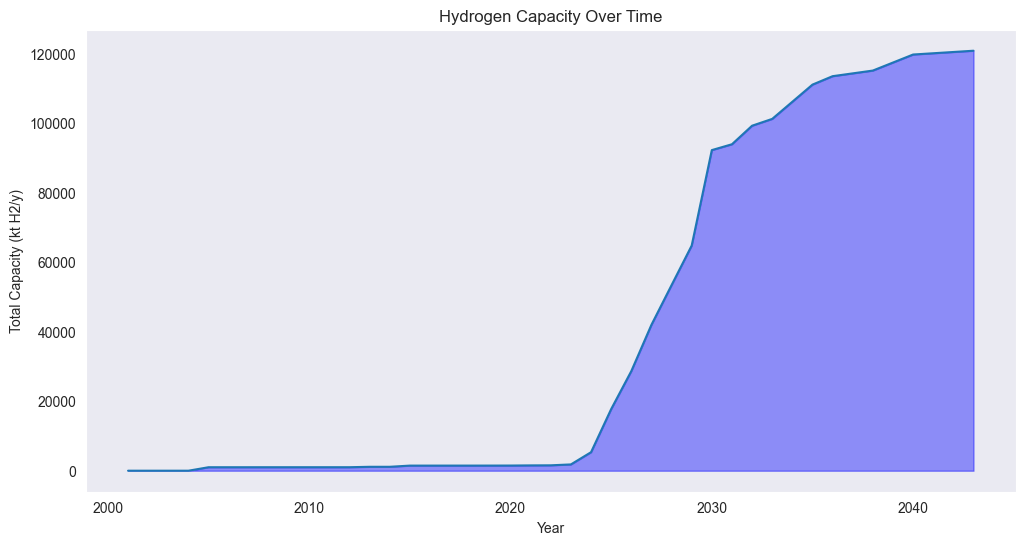

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(annual_capacity['Year'], annual_capacity["Total Capacity (kt H2/y)"])
plt.fill_between(annual_capacity['Year'], annual_capacity["Total Capacity (kt H2/y)"], 0, color='blue', alpha=.4)
plt.title('Hydrogen Capacity Over Time')
plt.xlabel('Year')
plt.ylabel('Total Capacity (kt H2/y)')
plt.grid()
plt.show()

 Count the number of projects by country

In [12]:
country_data = data[['Country', 'Project name']].dropna(subset=['Country'])
project_count_by_country = country_data.groupby('Country').size().reset_index(name='Number of Projects')

Load world shapefile using Geopandas

Merge world geometries with project counts

Fill NaN values with 0 for countries with no projects

In [13]:
import geopandas as gpd


world = gpd.read_file('ne_110m_admin_0_countries')
world = world.merge(project_count_by_country, how='left', left_on='ADM0_A3', right_on='Country')
world['Number of Projects'] = world['Number of Projects'].fillna(0)

Plotting

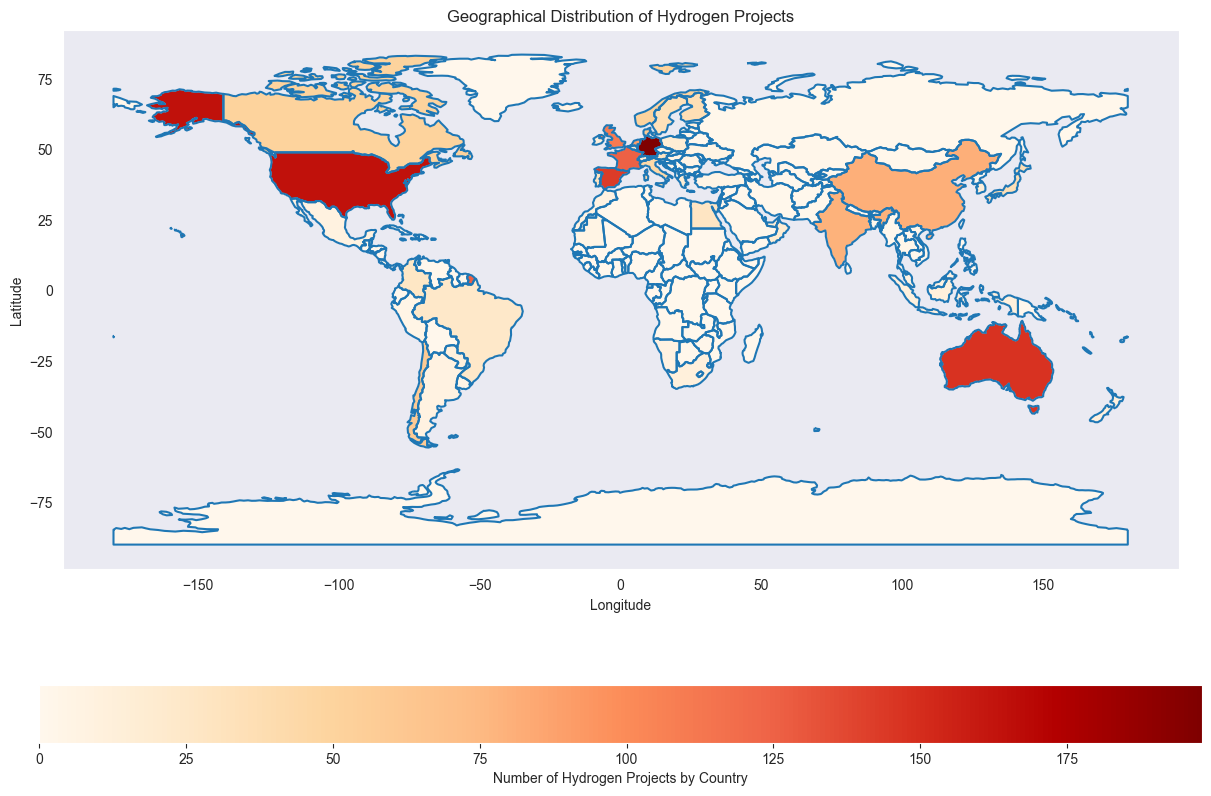

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(
    column='Number of Projects',
    ax=ax,
    legend=True,
    legend_kwds={
       'label': "Number of Hydrogen Projects by Country",
       'orientation': "horizontal"
    },
    cmap='OrRd',
    missing_kwds={
        "color": "lightgrey",
        "label": "No Projects"
})
plt.title('Geographical Distribution of Hydrogen Projects')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(False)
plt.show()

Convert end-use columns to numerical values

In [33]:
end_use_columns = [
    'EndUse_Refining',
    'EndUse_Ammonia',
    'EndUse_Methanol',
    'EndUse_Iron&Steel',
    'EndUse_Other Ind',
    'EndUse_Mobility',
    'EndUse_Power',
    'EndUse_Grid inj.',
    'EndUse_CHP',
    'EndUse_Domestic heat',
    'EndUse_Biofuels',
    'EndUse_Synfuels',
    'EndUse_CH4 grid inj.',
    'EndUse_CH4 mobility',
]

data[end_use_columns] = data[end_use_columns].map(lambda x: 0 if pd.isnull(x) else x)
data.head()

,Ref,Project name,Country,Date online,Decomission date,Status,Technology,Technology_details,Technology_electricity,Technology_electricity_details,...,EndUse_CH4 mobility,Announced Size,Capacity_MWel,Capacity_Nm³ H₂/h,Capacity_kt H2/y,Capacity_t CO₂ captured/y,zero-carbon estimated normalized capacity [Nm³ H₂/hour],References,LOWE_CF,Year
0,2,Solar PV Plant port of Sines,PRT,2030-01-01,NaT,Feasibility study,Other Electrolysis,Unknown PtX,Dedicated renewable,Offshore wind,...,0,1GW,NaN,NaN,NaN,NaN,NaN,[495][607][608][1064],0.55,2030.0
1,3,H2GO Energy Park Oude-Tonge - 1st phase,NLD,2023-01-01,NaT,FID/Construction,Other Electrolysis,Unknown PtX,Dedicated renewable,Others/Various,...,0,2.5MW,2.500000,556.0,0.4,NaN,556.0,[503][630][609],0.50,2023.0
2,4,H2GO Energy Park Oude-Tonge - 2nd phase,NLD,2030-01-01,NaT,Concept,Other Electrolysis,Unknown PtX,Dedicated renewable,Others/Various,...,0,26MW,23.500000,5222.0,4.1,NaN,5222.0,[503][630][609],0.50,2030.0
3,5,"NortH2, phase 1",NLD,2030-01-01,NaT,Feasibility study,Other Electrolysis,Unknown PtX,Dedicated renewable,Offshore wind,...,0,4GW,4000.000000,888889.0,693.0,NaN,888889.0,[379],0.55,2030.0
4,6,Norsk e-Fuel Phase 1,NOR,2026-01-01,NaT,FID/Construction,SOEC,NaN,Dedicated renewable,Others/Various,...,0,12.5 million litres of synthetic kerosene per ...,50.263583,13227.0,10.3,NaN,13227.0,[414] [521][1288][1449] [1693],0.50,2026.0


Sum the hydrogen projects for each end-use sector

Determine current demand representation as a percentage

In [36]:
end_use_sum = data[end_use_columns].sum().reset_index()
end_use_sum.columns = ['Sector', 'Number of Projects']
total_projects = end_use_sum['Number of Projects'].sum()
end_use_sum['Percentage'] = (end_use_sum['Number of Projects'] / total_projects) * 100
end_use_sum.head()

,Sector,Number of Projects,Percentage
0,EndUse_Refining,150,6.967023
1,EndUse_Ammonia,296,13.748258
2,EndUse_Methanol,93,4.319554
3,EndUse_Iron&Steel,80,3.715745
4,EndUse_Other Ind,304,14.119833


Visualization of current hydrogen demand by sector

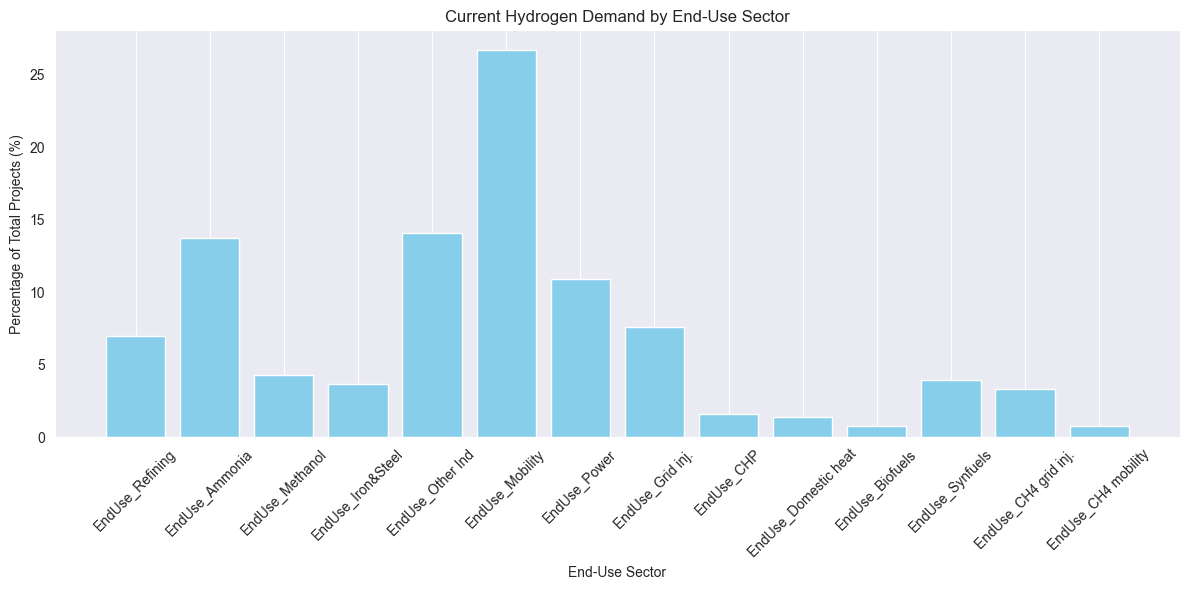

In [37]:
plt.figure(figsize=(12, 6))
plt.bar(end_use_sum['Sector'], end_use_sum['Percentage'], color='skyblue')
plt.title('Current Hydrogen Demand by End-Use Sector')
plt.xlabel('End-Use Sector')
plt.ylabel('Percentage of Total Projects (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Predicting future demand growth in sectors